In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#load the dataset
data = pd.read_csv('troop_movements.csv')

#display first few rows
print("first few rows of the dataframe:")
print(data.head())

first few rows of the dataframe:
             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 10:07:39        1  resistance_soldier           resistance   
1  2024-07-11 10:07:38        2              x-wing               empire   
2  2024-07-11 10:07:37        3  resistance_soldier               empire   
3  2024-07-11 10:07:36        4         tie_fighter           resistance   
4  2024-07-11 10:07:35        5             unknown               empire   

   location_x  location_y  destination_x  destination_y homeworld  
0          10           2              8              1  Tatooine  
1           9           7             10              6     Rodia  
2           8           5              8              4   Sullust  
3           8           6              4              5    Ryloth  
4          10           2              7              1  Kashyyyk  


In [2]:
#count empire vs resistance
empVsRes = data['empire_or_resistance'].value_counts()
print(empVsRes)

empire_or_resistance
resistance    518
empire        482
Name: count, dtype: int64


In [3]:
#count the homeworlds
homeworlds = data['homeworld'].value_counts()
print(homeworlds)

homeworld
Alderaan        34
Dathomir        33
Shili           33
Concord Dawn    31
Dagobah         30
Rodia           30
Mon Cala        30
Zolan           30
Sullust         29
Naboo           29
Ojom            29
Umbara          29
Muunilinst      28
Tholoth         28
Trandosha       27
Tatooine        27
Champala        26
Quermia         25
Eriadu          24
Chandrila       24
Glee Anselm     24
Kalee           24
Cerea           23
Bestine IV      23
Skako           23
Socorro         22
Kashyyyk        22
Corellia        21
Ryloth          21
Serenno         20
Toydaria        19
Tund            19
Aleen Minor     18
Troiken         18
Mirial          17
Iktotch         17
Haruun Kal      17
Iridonia        17
Malastare       17
Stewjon         16
Dorin           15
Vulpter         11
Name: count, dtype: int64


In [4]:
#count unit type
units = data['unit_type'].value_counts()
print(units)

unit_type
tie_fighter           139
tie_silencer          135
x-wing                132
unknown               126
resistance_soldier    125
at-at                 121
stormtrooper          116
at-st                 106
Name: count, dtype: int64


In [5]:
#create new column is resistance
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 10:07:39        1  resistance_soldier           resistance   
1  2024-07-11 10:07:38        2              x-wing               empire   
2  2024-07-11 10:07:37        3  resistance_soldier               empire   
3  2024-07-11 10:07:36        4         tie_fighter           resistance   
4  2024-07-11 10:07:35        5             unknown               empire   

   location_x  location_y  destination_x  destination_y homeworld  \
0          10           2              8              1  Tatooine   
1           9           7             10              6     Rodia   
2           8           5              8              4   Sullust   
3           8           6              4              5    Ryloth   
4          10           2              7              1  Kashyyyk   

   is_resistance  
0           True  
1          False  
2          False  
3           True  
4          False  


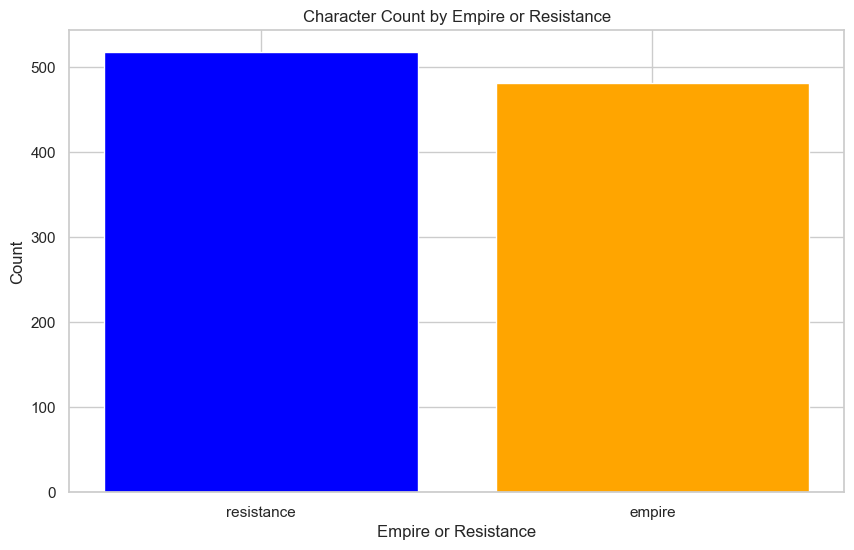

In [14]:
#set up seaborn
sns.set_theme(style="whitegrid")


#create bar plot
plt.figure(figsize=(10,6))
plt.bar(x=empVsRes.index, height=empVsRes.values, color=['blue', 'orange'])
plt.ylabel('Count')
plt.xlabel('Empire or Resistance')
plt.title("Character Count by Empire or Resistance")
plt.show()